### Here i am going to Analyse the ipl Data-set to find out the insights from that Data.


### Step 1:  Importing Packages

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

### Set the parameters to Seaborn and Matplotlib to Visualize data more efficiently 

In [2]:
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (14, 8)


### Now Import Data-Set 

In [5]:
matches = pd.read_csv('matches.csv')

### Now i am going to apply some basic operations of Pandas to our-IPL Data-set

In [6]:
# print number of columns and number of rows
print(matches.shape)


(636, 18)


In [7]:
#print the data type of each column  and number of rows existed for each column 
matches.info

<bound method DataFrame.info of       id  season           city        date                        team1  \
0      1    2017      Hyderabad  2017-04-05          Sunrisers Hyderabad   
1      2    2017           Pune  2017-04-06               Mumbai Indians   
2      3    2017         Rajkot  2017-04-07                Gujarat Lions   
3      4    2017         Indore  2017-04-08       Rising Pune Supergiant   
4      5    2017      Bangalore  2017-04-08  Royal Challengers Bangalore   
5      6    2017      Hyderabad  2017-04-09                Gujarat Lions   
6      7    2017         Mumbai  2017-04-09        Kolkata Knight Riders   
7      8    2017         Indore  2017-04-10  Royal Challengers Bangalore   
8      9    2017           Pune  2017-04-11             Delhi Daredevils   
9     10    2017         Mumbai  2017-04-12          Sunrisers Hyderabad   
10    11    2017        Kolkata  2017-04-13              Kings XI Punjab   
11    12    2017      Bangalore  2017-04-14  Royal Chall

In [8]:
#print the count,min,max,standard deviation and percentages 
matches.describe()


,id,season,dl_applied,win_by_runs,win_by_wickets,umpire3
count,636.000000,636.000000,636.000000,636.000000,636.000000,0.0
mean,318.500000,2012.490566,0.025157,13.682390,3.372642,NaN
std,183.741666,2.773026,0.156726,23.908877,3.420338,NaN
min,1.000000,2008.000000,0.000000,0.000000,0.000000,NaN
25%,159.750000,2010.000000,0.000000,0.000000,0.000000,NaN
50%,318.500000,2012.000000,0.000000,0.000000,4.000000,NaN
75%,477.250000,2015.000000,0.000000,20.000000,7.000000,NaN
max,636.000000,2017.000000,1.000000,146.000000,10.000000,NaN


In [9]:
#print two rows with headings
matches.head(2)


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


#### How many mathces that data-set has

In [52]:
matches['id'].max()

636

#### How many seasons were done in this data-set

In [17]:
print("the seasons were done in =>",list(matches['season'].unique()))
print("the nuber of seasons are = ",len(matches['season'].unique()) )

the seasons were done in => [2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
the nuber of seasons are =  10


#### which team had won by maximum runs...?

In [54]:
matches.iloc[matches['win_by_runs'].idxmax()]['winner']

'Mumbai Indians'

#### which team had won by minimum runs...?

In [88]:
matches.iloc[matches[matches['win_by_runs'].ge(1)].win_by_runs.idxmin()]['winner']

'Mumbai Indians'

#### which team had won by maximum wickets...?

In [55]:
matches.iloc[matches['win_by_wickets'].idxmax()]['winner']


'Kolkata Knight Riders'

#### which team had won by minimum wickets...?

In [49]:
matches.iloc[matches[matches['win_by_wickets'].ge(0)].win_by_wickets.idxmin()]['winner']

'Sunrisers Hyderabad'

In [36]:
matches.iloc[matches[matches['win_by_wickets'].ge(1)].win_by_wickets.idxmin()]

id                                   560
season                              2015
city                             Kolkata
date                          2015-05-09
team1                    Kings XI Punjab
team2              Kolkata Knight Riders
toss_winner              Kings XI Punjab
toss_decision                        bat
result                            normal
dl_applied                             0
winner             Kolkata Knight Riders
win_by_runs                            0
win_by_wickets                         1
player_of_match               AD Russell
venue                       Eden Gardens
umpire1                     AK Chaudhary
umpire2                  HDPK Dharmasena
umpire3                              NaN
Name: 559, dtype: object

### Which season had more number of matches 

In [80]:
k=list(matches['season'])
s=list(matches['season'].unique())
m=0
for i in s:
    c=k.count(i)
    if m<c:
        m=c
        index=i
print("season {} consists more matches and matches count is {}".format(index,m))

season 2013 consists more matches and matches count is 76


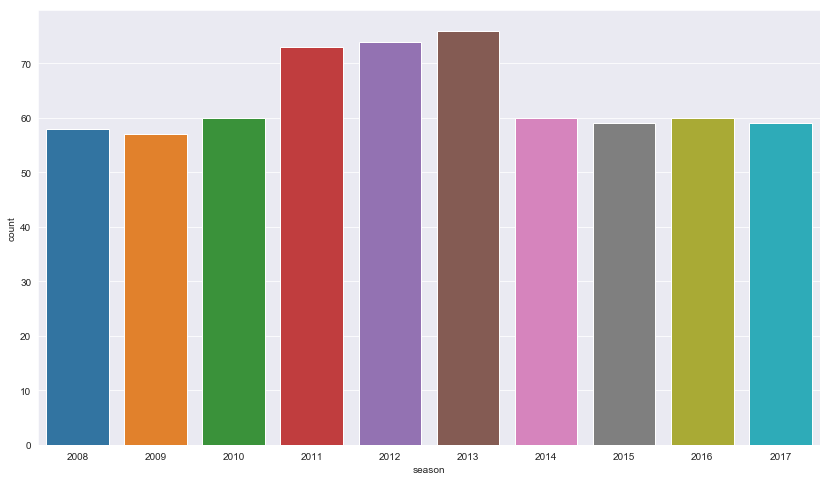

In [83]:
sns.countplot(x='season', data=matches)
plt.show()

### Here is the most important insight that which team is most Successful

In [95]:
k=list(matches['winner'])
k.count('Mumbai Indians')

92

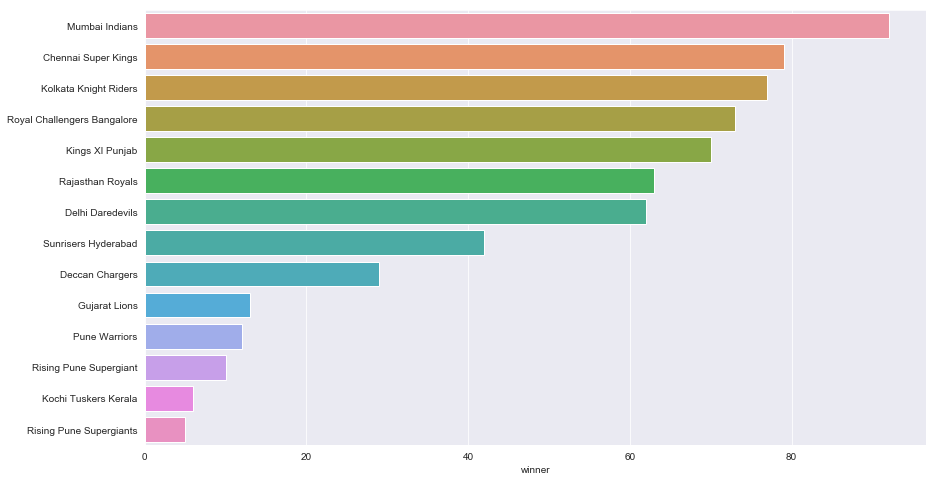

In [94]:
data = matches.winner.value_counts()
sns.barplot(y = data.index, x = data, orient='h');

### Has Toss-winning helped in Match-winning

In [103]:
ss = matches['toss_winner'] == matches['winner']
print(ss.groupby(ss).size())
k=list(ss.groupby(ss).size())
if k[1]>k[0]:
    print("Toss winning help in match winning")
else:
    print("Toss winning not help in match winning")

False    311
True     325
dtype: int64
Toss winning help in match winning


### Now draw the graph for Truth and False category

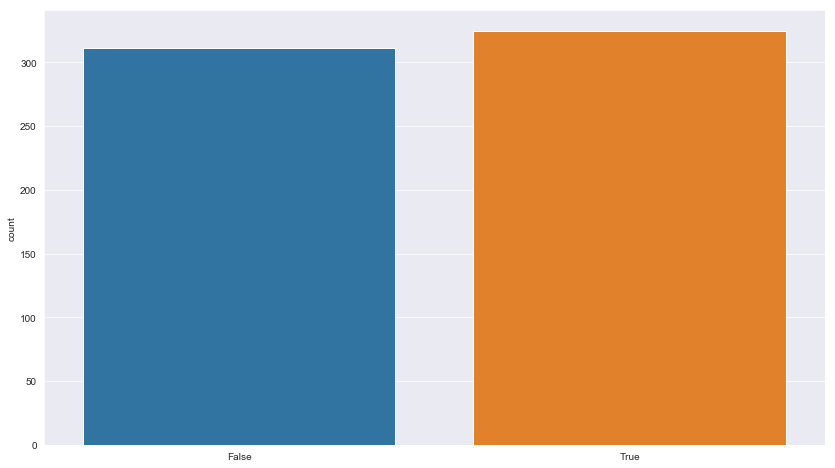

In [104]:
p.countplot(ss)

In [35]:
matches.win_by_wickets.idxmin()

0

In [23]:
matches['win_by_runs'].max()

146